# WeatherPy
----

### Analysis
* It is unsurprising but very visible in the data shown below,  that as you get closer to 
![alt text]('output_data/LatitudeVsMaxTemp.png'?raw=true "Latitude vs Max Temperature (F)")
* 
* 



In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
def api_call(x,y):
    return requests.get(f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={x}&q={y}').json()

In [34]:
columns = ("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed")
weatherdata = pd.DataFrame(columns=columns)

In [35]:
print(f"Beinning Data Retreival")
print("-"*27)

record = 1
group = 1
index = 1

for city in cities:
    response = api_call(api_key,city)
    try:
        print(f"Processing Record {record} of Set {group} | {city}")
        weatherdata.set_value(index, "City", city)
        weatherdata.set_value(index, "Cloudiness", response['clouds']['all'])
        weatherdata.set_value(index, "Country", response['sys']['country'])
        weatherdata.set_value(index, "Date", response['dt'])
        weatherdata.set_value(index, "Humidity", response['main']['humidity'])
        weatherdata.set_value(index, "Lat", response['coord']['lat'])
        weatherdata.set_value(index, "Lng", response['coord']['lon'])
        weatherdata.set_value(index, "Max Temp", response['main']['temp_max'])
        weatherdata.set_value(index, "Wind Speed", response['wind']['speed'])
        record +=1
        index +=1
        time.sleep(random.randint(1,3))
    except:
        print("City not found. Skipping...")
        record +=1
    finally:
        if record > 50:
            record = 1
            group += 1


Beinning Data Retreival
---------------------------
Processing Record 1 of Set 1 | aksu


C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a 

Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | wasilla
Processing Record 4 of Set 1 | boende
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | arlit
Processing Record 7 of Set 1 | mollendo
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | verkhnetulomskiy
Processing Record 10 of Set 1 | chulman
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | makakilo city
Processing Record 16 of Set 1 | tacuati
Processing Record 17 of Set 1 | paracatu
Processing Record 18 of Set 1 | babanusah
City not found. Skipping...
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | santa elena
Processing Record 21 of Set 1 | kolosovka
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | carauari
Processing Record 24 of Set 1 | rawson
Processing Record 25 of Set 1 | illoqq

Processing Record 40 of Set 4 | dikson
Processing Record 41 of Set 4 | mgandu
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | smoky lake
Processing Record 44 of Set 4 | bilma
Processing Record 45 of Set 4 | tran
Processing Record 46 of Set 4 | saint anthony
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | lannion
Processing Record 49 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | kurtalan
Processing Record 2 of Set 5 | nkawkaw
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | sola
Processing Record 6 of Set 5 | soe
Processing Record 7 of Set 5 | kristinehamn
Processing Record 8 of Set 5 | raudeberg
Processing Record 9 of Set 5 | viedma
Processing Record 10 of Set 5 | halalo
City not found. Skipping...
Processing Record 11 of Set 5 | torbay
Processing Record 12 of Set 5 | ubajara
Proc

Processing Record 27 of Set 8 | turbat
Processing Record 28 of Set 8 | baruun-urt
Processing Record 29 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 30 of Set 8 | kyshtovka
Processing Record 31 of Set 8 | mendahara
City not found. Skipping...
Processing Record 32 of Set 8 | belaya gora
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | kotka
Processing Record 35 of Set 8 | mazatlan
Processing Record 36 of Set 8 | sioux lookout
Processing Record 37 of Set 8 | hovd
Processing Record 38 of Set 8 | riachao das neves
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | pimentel
Processing Record 41 of Set 8 | lufilufi
Processing Record 42 of Set 8 | deori
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | nome
Processing Record 45 of Set 8 | dubbo
Processing Record 46 of Set 8 | salinas
Processing Record 47 of Set 8 | mkushi
Processing Record 48 of Set 8 | guajara-mirim
City not found. Skipping...
Proc

Processing Record 15 of Set 12 | kinshasa
Processing Record 16 of Set 12 | xifeng
Processing Record 17 of Set 12 | perevolotskiy
Processing Record 18 of Set 12 | kidal
Processing Record 19 of Set 12 | swan hill
Processing Record 20 of Set 12 | den helder
Processing Record 21 of Set 12 | nieuw amsterdam
Processing Record 22 of Set 12 | sao jose da coroa grande
Processing Record 23 of Set 12 | gornyye klyuchi
Processing Record 24 of Set 12 | morant bay
Processing Record 25 of Set 12 | cozumel
City not found. Skipping...
Processing Record 26 of Set 12 | narok
Processing Record 27 of Set 12 | anakapalle
Processing Record 28 of Set 12 | ust-tsilma
Processing Record 29 of Set 12 | komsomolskiy
Processing Record 30 of Set 12 | ust-koksa
Processing Record 31 of Set 12 | pavullo nel frignano
Processing Record 32 of Set 12 | makrakomi
Processing Record 33 of Set 12 | tessalit
Processing Record 34 of Set 12 | imbituba
Processing Record 35 of Set 12 | maragogi
Processing Record 36 of Set 12 | labu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
weatherdata.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [37]:
weatherdata.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,aksu,0,KZ,1556926200,64,52.04,76.93,33.8,4.43
2,hithadhoo,100,MV,1556928240,77,-0.6,73.08,84.44,8.21
3,wasilla,90,US,1556928209,46,61.58,-149.44,53.01,3.36
4,boende,74,CD,1556928242,82,-0.28,20.88,74.88,0.85
5,ushuaia,0,AR,1556924400,64,-54.81,-68.31,37.4,12.75


In [38]:
weatherdata.to_csv(output_data_file)

In [39]:
weatherdata

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,aksu,0,KZ,1556926200,64,52.04,76.93,33.8,4.43
2,hithadhoo,100,MV,1556928240,77,-0.6,73.08,84.44,8.21
3,wasilla,90,US,1556928209,46,61.58,-149.44,53.01,3.36
4,boende,74,CD,1556928242,82,-0.28,20.88,74.88,0.85
5,ushuaia,0,AR,1556924400,64,-54.81,-68.31,37.4,12.75
6,arlit,13,NE,1556928247,7,18.74,7.39,85.01,4.92
7,mollendo,3,PE,1556928250,82,-17.03,-72.02,67.3,6.69
8,jamestown,4,AU,1556928112,78,-33.21,138.6,57.04,5.77
9,verkhnetulomskiy,75,RU,1556926200,86,68.61,31.8,28.4,4.47
10,chulman,79,RU,1556928256,81,56.84,124.9,26.75,11.7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

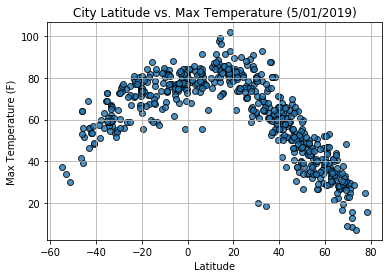

In [40]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Max Temp"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Max Temperature (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_data/LatitudeVsMaxTemp.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Humidity Plot

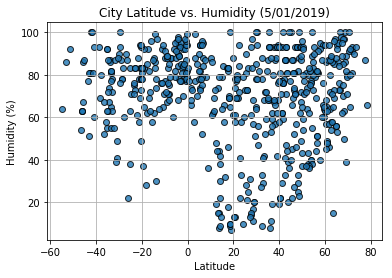

In [41]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Humidity"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Humidity (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/LatitudeVsHumidity.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Cloudiness Plot

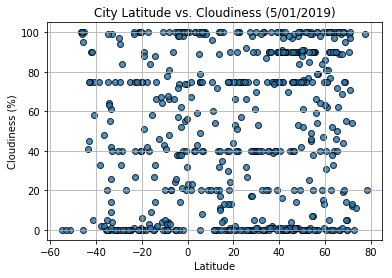

In [42]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Cloudiness"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Cloudiness (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/LatitudeVsCloudiness.png', bbox_inches = 'tight')
plt.show()

#### Latitude vs. Wind Speed Plot

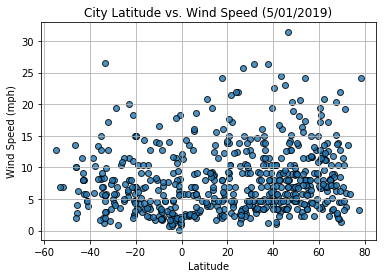

In [43]:
plt.scatter(x = weatherdata["Lat"], y=weatherdata["Wind Speed"], edgecolors='black', alpha=.8)
plt.title("City Latitude vs. Wind Speed (5/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_data/LatitudeVsWindSpeed.png', bbox_inches = 'tight')
plt.show()

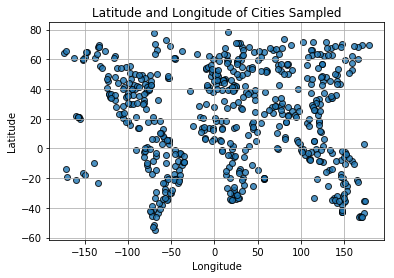

In [50]:
plt.scatter(x=weatherdata["Lng"], y = weatherdata["Lat"], edgecolors='black', alpha=.8)
plt.title("Latitude and Longitude of Cities Sampled")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('output_data/LatVsLong.png', bbox_inches = 'tight')
plt.show()